## Micro Trip Calculation for All Trips

In [1]:
all_micro_trips = []

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
trip_files = ["Trip1.csv", "Trip2.csv", "Trip3.csv", "Trip4.csv","Trip5.csv", "Trip6.csv","Trip7.csv", "Trip8.csv",
              "Trip9.csv", "Trip10.csv","Trip11.csv", "Trip12.csv","Trip13.csv", "Trip14.csv","Trip15.csv", "Trip16.csv"]

In [7]:
for trip_file in trip_files:
  data = pd.read_csv(trip_file)
  data = data[['LOCAL TIME','SPEED']]
  data['LOCAL TIME'] = pd.to_datetime(data['LOCAL TIME'], format='%H:%M:%S')

  initial = data.iloc[0]
  data = data[1:]
  print(f"There are {len(data[data['SPEED'] > 100])} where SPEED is higher than 100")
  data = data[data['SPEED'] <= 100]

  data['SPEED'] = data['SPEED'] * 1000 / 3600
  data['TIME DIFFERENCE'] = data['LOCAL TIME'].diff()
  data['TIME DIFFERENCE'] = data['TIME DIFFERENCE'].dt.total_seconds()

  data['Accelaration'] = data['SPEED'].diff()/data['TIME DIFFERENCE']

  high_acc_data = data[(data['Accelaration'] >= 1.8)]
  low_acc_data =  data[(data['Accelaration'] <= -1.8)]

  print("No. of High Acceleration Data: ",high_acc_data.shape[0])
  print("No. of Low Acceleration Data: ",low_acc_data.shape[0])

  data = data[(data['Accelaration'] <= 1.8) & (data['Accelaration'] >= -1.8)]
  data['DISTANCE'] = data['SPEED'].cumsum()

  data.to_csv(f"{trip_file[:-4]}_filtered.csv")

  os.makedirs(f"microtrips/{trip_file[:-4]}")

  micro_trips = []
  num_of_rows = data.shape[0]
  start = 0
  micro_trip = pd.DataFrame()
  speed_threshold = 0.4

  for i in range(num_of_rows):
    micro_trip = micro_trip.append(data.iloc[i])
    if (data.iloc[i]['SPEED'] <= speed_threshold) and (i - start) > 100 :
      average_speed = data.iloc[start:i+1]['SPEED'].mean()
      micro_trips.append([micro_trip, average_speed])
      micro_trip.to_csv(f'microtrips/{trip_file[:-4]}/{start}-{i}.csv')
      start = i+1
      micro_trip = pd.DataFrame()

  print(f"{trip_file[:-4]}'s Microtrips Created")

  all_micro_trips.extend(micro_trips)

There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  6
No. of Low Acceleration Data:  25
Trip1's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  9
No. of Low Acceleration Data:  13
Trip2's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  9
No. of Low Acceleration Data:  13
Trip3's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  6
No. of Low Acceleration Data:  25
Trip4's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  9
No. of Low Acceleration Data:  13
Trip5's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  6
No. of Low Acceleration Data:  25
Trip6's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  9
No. of Low Acceleration Data:  23
Trip7's Microtrips Created
There are 0 where SPEED is higher 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Trip13's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  6
No. of Low Acceleration Data:  14
Trip14's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  6
No. of Low Acceleration Data:  6
Trip15's Microtrips Created
There are 0 where SPEED is higher than 100
No. of High Acceleration Data:  71
No. of Low Acceleration Data:  50
Trip16's Microtrips Created


## MicroTrip Calculation Test for One trip



In [ ]:
# trip_file = 'Trip 2.csv'
# data = pd.read_csv(trip_file)

In [ ]:
# data.head()

In [ ]:
# #get only LOCAL TIME and SPEED Colum from data
# data = data[['LOCAL TIME','SPEED']]

In [ ]:
# #convert LOCAL TIME to time format
# data['LOCAL TIME'] = pd.to_datetime(data['LOCAL TIME'], format='%H:%M:%S')

In [ ]:
# data.head()

In [ ]:
# #get first row values
# initial = data.iloc[0]

In [ ]:
#remove first row
# data = data[1:]

In [ ]:
# data.head()

In [ ]:
# #remove rows with SPEED is higher than 100
# data = data[data['SPEED'] <= 100]

In [ ]:
# data.head()

In [ ]:
# data.describe()

In [ ]:
# #convert speed from kmh to ms
# data['SPEED'] = data['SPEED'] * 1000 / 3600

In [ ]:
# #get time difference between each row in seconds
# data['TIME DIFFERENCE'] = data['LOCAL TIME'].diff()
# #convert to seconds
# data['TIME DIFFERENCE'] = data['TIME DIFFERENCE'].dt.total_seconds()

In [ ]:
# #calculate Accelaration with time
# data['Accelaration'] = data['SPEED'].diff()/data['TIME DIFFERENCE']

In [ ]:
# data.head()

In [ ]:
# high_acc_data = data[(data['Accelaration'] >= 1.8)]
# low_acc_data =  data[(data['Accelaration'] <= -1.8)]

In [ ]:
# print("No. of High Acceleration Data: ",high_acc_data.shape[0])
# print("No. of Low Acceleration Data: ",low_acc_data.shape[0])

In [ ]:
# #remove all the rows with acceleration above 1.8 and below -1.8
# data = data[(data['Accelaration'] <= 1.8) & (data['Accelaration'] >= -1.8)]

In [ ]:
# data.head()

In [ ]:
# data.describe()

In [ ]:
# #calculate distance for each row
# data['DISTANCE'] = data['SPEED'].cumsum()

In [ ]:
# data.head()

In [ ]:
# data.to_csv('filtered_data_trip2.csv')

In [ ]:
# !rm -rf micro_trips_trip_2
# !mkdir micro_trips_trip_2

In [ ]:
# micro_trips = []
# num_of_rows = data.shape[0]
# start = 0
# micro_trip = pd.DataFrame()
# speed_threshold = 0.4

# for i in range(num_of_rows):
#   micro_trip = micro_trip.append(data.iloc[i])
#   if (data.iloc[i]['SPEED'] <= speed_threshold) and (i - start) > 100 :
#     average_speed = data.iloc[start:i+1]['SPEED'].mean()
#     micro_trips.append([micro_trip, average_speed])
#     micro_trip.to_csv(f'micro_trips_trip_2/{start}-{i}.csv')
#     start = i+1
#     micro_trip = pd.DataFrame()
  

# # while total_time < 300:
# #     if data.iloc[end]['TIME DIFFERENCE'] > 100:
# #         print("Check row: ", end)
# #         print("Time difference: ", data.iloc[end]['TIME DIFFERENCE'])
# #         df.to_csv(f'{start}-{end}.csv')
# #         average_speed = data.iloc[start:end]['SPEED'].mean()
# #         micro_trip.append([df,average_speed])
# #         start = end + 1
# #         end = end + 1
# #         total_time = 0
# #         df = pd.DataFrame()
# #         continue
# #     total_time += data.iloc[end]['TIME DIFFERENCE']
# #     df = df.append(data.iloc[end])
# #     end += 1
# #     if end == num_of_rows:
# #         df.to_csv(f'{start}-{end}.csv')
# #         average_speed = data.iloc[start:end]['SPEED'].mean()
# #         micro_trip.append([df,average_speed])
# #         break
# #     if total_time >= 300:
# #         df.to_csv(f'{start}-{end}.csv')
# #         average_speed = data.iloc[start:end]['SPEED'].mean()
# #         micro_trip.append([df,average_speed])
# #         start = end + 1
# #         total_time = 0
# #         df = pd.DataFrame()


In [ ]:
# #plot speed with time
# import matplotlib.pyplot as plt
# for micro_trip in micro_trips:
#   plt.plot(micro_trip[0]['LOCAL TIME'],micro_trip[0]['SPEED'])
#   # uncomment the following line to show seperate micro trips
#   # plt.show()

In [ ]:
# #plot speed with time
# import matplotlib.pyplot as plt
# for micro_trip in micro_trips:
#   plt.plot(micro_trip[0]['SPEED'])
#   # uncomment the following line to show seperate micro trips
#   # plt.show()

In [ ]:
# for micro_trip in micro_trips:
#   all_micro_trips.append(micro_trip)

In [ ]:
# zero_microtrips = []
# non_zero_microtrips = []

# avg_speed_thresh = 0.15
# for microtrip in all_micro_trips:
#   if microtrip[1] <= avg_speed_thresh:
#     zero_microtrips.append(microtrip)
#   else:
#     non_zero_microtrips.append(microtrip)

## Bins Creation

In [8]:
zero_microtrips = []
non_zero_microtrips = []

avg_speed_thresh = 0.15
for microtrip in all_micro_trips:
  if microtrip[1] <= avg_speed_thresh:
    zero_microtrips.append(microtrip)
  else:
    non_zero_microtrips.append(microtrip)

In [9]:
len(zero_microtrips)

68

In [33]:
use_zero_speed_seperation = False
if use_zero_speed_seperation:
  temp_micro_trips = non_zero_microtrips
else:
  temp_micro_trips = all_micro_trips

In [34]:
bins = {
    "0-5":{
        "min": 0,
        "max": 5,
        "micro_trips": []
    },
    "5-10":{
        "min": 5,
        "max": 10,
        "micro_trips": []
    },
    "10-15":{
        "min": 10,
        "max": 15,
        "micro_trips": []
    }
}

In [35]:
for bin in bins.keys():
  for i,micro_trip in enumerate(temp_micro_trips):
    if micro_trip[1] <= bins[bin]["max"] and micro_trip[1] >= bins[bin]["min"]:
      bins[bin]["micro_trips"].append(micro_trip[0])

## Micro Trip Connection

In [36]:
trip = pd.read_csv("Trip11_filtered.csv")

In [37]:
trip.head()

,Unnamed: 0,LOCAL TIME,SPEED,TIME DIFFERENCE,Accelaration,DISTANCE
0,2,1900-01-01 17:46:17,0.492275,1.0,0.008230,0.492275
1,3,1900-01-01 17:46:18,0.447127,1.0,-0.045148,0.939403
2,5,1900-01-01 17:46:20,3.448334,1.0,0.765065,4.387736
3,6,1900-01-01 17:46:21,4.141531,1.0,0.693197,8.529267
4,7,1900-01-01 17:46:22,4.859535,1.0,0.718004,13.388802


In [38]:
microtrip_avg_speeds = [microtrip[1] for microtrip in all_micro_trips]

In [39]:
population_avg_speed = sum(microtrip_avg_speeds)/len(microtrip_avg_speeds) * 1.0

In [40]:
population_avg_speed

6.285107035673132

In [41]:
up_bins = []
low_bins = []
for bin in bins.keys():
  if bins[bin]["max"] <= population_avg_speed:
    low_bins.append(bin)
  elif bins[bin]["min"] >= population_avg_speed:
    up_bins.append(bin)
  else:
    low_bins.append(bin)
    up_bins.append(bin)
  

In [42]:
up_bins

['5-10', '10-15']

In [43]:
low_bins

['0-5', '5-10']

In [89]:
import random

In [90]:
random_bin = random.choice(list(bins.keys()))
first_micro_trip = random.choice(bins[random_bin]["micro_trips"])

In [91]:
random_bin

'0-5'

In [92]:
first_micro_trip

,LOCAL TIME,SPEED,TIME DIFFERENCE,Accelaration,DISTANCE
3697,1900-01-01 16:41:39,0.001998,1.0,-0.002423,15389.696913
3698,1900-01-01 16:41:40,0.012505,1.0,0.010508,15389.709419
3699,1900-01-01 16:41:41,0.011513,1.0,-0.000993,15389.720931
3700,1900-01-01 16:41:42,0.008393,1.0,-0.003119,15389.729324
3701,1900-01-01 16:41:43,0.011824,1.0,0.003431,15389.741149
...,...,...,...,...,...
3794,1900-01-01 16:43:16,0.027759,1.0,-0.011175,15391.001457
3795,1900-01-01 16:43:17,0.013634,1.0,-0.014125,15391.015091
3796,1900-01-01 16:43:18,0.008708,1.0,-0.004926,15391.023799
3797,1900-01-01 16:43:19,0.016438,1.0,0.007730,15391.040237


In [93]:
avg_speed = first_micro_trip['SPEED'].mean()

In [94]:
avg_speed

0.013371949891067537

In [95]:
optimized_trip = first_micro_trip[['SPEED']].reset_index()

In [96]:
optimized_trip.drop('index', axis='columns', inplace=True)

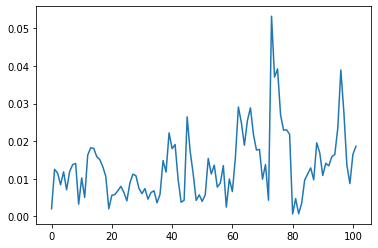

In [97]:
plt.plot(optimized_trip['SPEED'])

In [98]:
selected_microtrips = []
while optimized_trip.shape[0] < 1200:
  if avg_speed > population_avg_speed:
    random_low_bin = random.choice(low_bins)
    print(random_low_bin)
    next_micro_trip = random.choice(bins[random_low_bin]["micro_trips"])
  elif avg_speed < population_avg_speed:
    random_up_bin = random.choice(up_bins)
    print(random_up_bin)
    next_micro_trip = random.choice(bins[random_up_bin]["micro_trips"])
  selected_microtrips.append(next_micro_trip)
  next_micro_trip = next_micro_trip[['SPEED']].reset_index()
  next_micro_trip.drop('index', axis='columns', inplace=True)

  optimized_trip = pd.concat([optimized_trip, next_micro_trip]).reset_index()
  optimized_trip.drop('index', axis='columns', inplace=True)

5-10
5-10
5-10
10-15


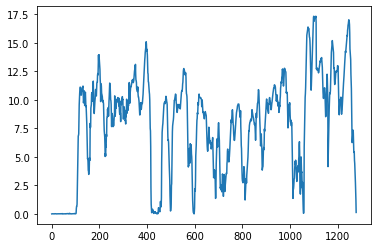

In [99]:
plt.plot(optimized_trip['SPEED'])

In [100]:
optimized_trip['SPEED'].mean()

7.811453635672057

In [102]:
len(selected_microtrips)

4

In [112]:
selected_microtrips[0].head()

,LOCAL TIME,SPEED,TIME DIFFERENCE,Accelaration,DISTANCE
292,1900-01-01 17:49:55,0.063876,1.0,-0.160619,3520.432029
293,1900-01-01 17:49:56,0.481288,1.0,0.417412,3520.913317
294,1900-01-01 17:49:57,0.659493,1.0,0.178205,3521.572810
295,1900-01-01 17:49:58,0.666053,1.0,0.006560,3522.238863
296,1900-01-01 17:49:59,0.847873,1.0,0.181821,3523.086736


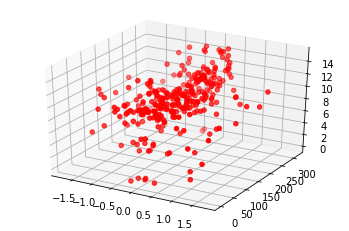

In [123]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def draw_3d_plot(trip):

  # trip["LOCAL TIME"] = pd.to_datetime(trip["LOCAL TIME"])
  z = np.array(trip["SPEED"])
  y = np.array(range(len(trip)))
  x = np.array(trip["Accelaration"])

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
  ax.scatter(x, y, z, c='red')
  plt.show()

draw_3d_plot(selected_microtrips[0])